In [2]:
%matplotlib inline

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def plot_3D_axis():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax._axis3don = False
    ax.plot(np.zeros(3),np.array(range(-1,2)),np.zeros(3),"k-")
    ax.plot(np.array(range(-1,2)),np.zeros(3),np.zeros(3),"k-")
    ax.plot(np.zeros(3),np.zeros(3),np.array(range(-1,2)),"k-")
    ax.set_xlim([-0.5,0.5])
    ax.set_ylim([-0.5,0.5])
    ax.set_zlim([-0.5,0.5])
    ax.set_xticks([-1,-0.5,0,0.5,1])
    ax.set_xticklabels([],fontsize=20)
    ax.set_yticks([-1,-0.5,0,0.5,1])
    ax.set_yticklabels([],fontsize=20)
    ax.set_zticks([-1,-0.5,0,0.5,1])
    ax.set_zticklabels([],fontsize=20)
    ax.text(1.05,0,0,"$D_1$",fontsize=17)
    ax.text(0,1.05,0,"$D_2$",fontsize=17)
    ax.text(0,0,1.05,"$D_3$",fontsize=17)
    ax.text(-0.1,-0.01,0.01,"$\mathcal{O}$",fontsize=20)
    return(ax)

# Generate Matrix

In [5]:
m = 200
n = 3
T = np.array([[1,1,1],
              [0,1,3],
              [2,0,2]]) # matrice quelconque 3x3
sigma = 0.05
mean = np.asarray([0.4,0.2,0.4])
X = np.random.randn(m,n) * sigma 
A = np.dot(X,T) + mean

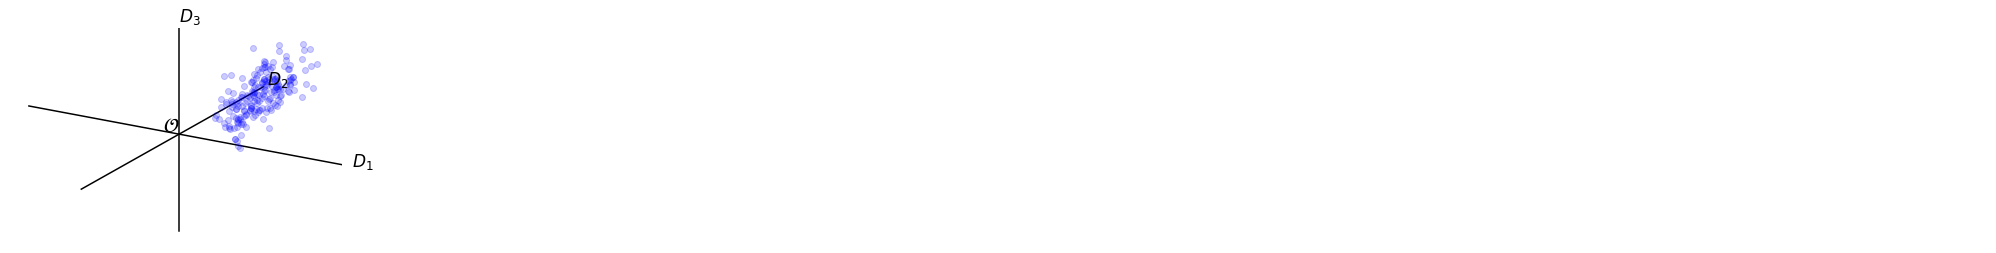

In [6]:
ax = plot_3D_axis()
for a in A:
    ax.plot([a[0]],[a[1]],[a[2]],"o",alpha=0.2,color="b")

# Simple Projector (cardinal)

In [7]:
P_x_y = np.asarray([[1,0,0],
                    [0,1,0],
                    [0,0,0]])

P_y_z = np.asarray([[0,0,0],
                    [0,1,0],
                    [0,0,1]])

P_x_z = np.asarray([[1,0,0],
                    [0,0,0],
                    [0,0,1]])

In [8]:
A_x_y = np.dot(A,P_x_y)
A_y_z = np.dot(A,P_y_z)
A_x_z = np.dot(A,P_x_z)

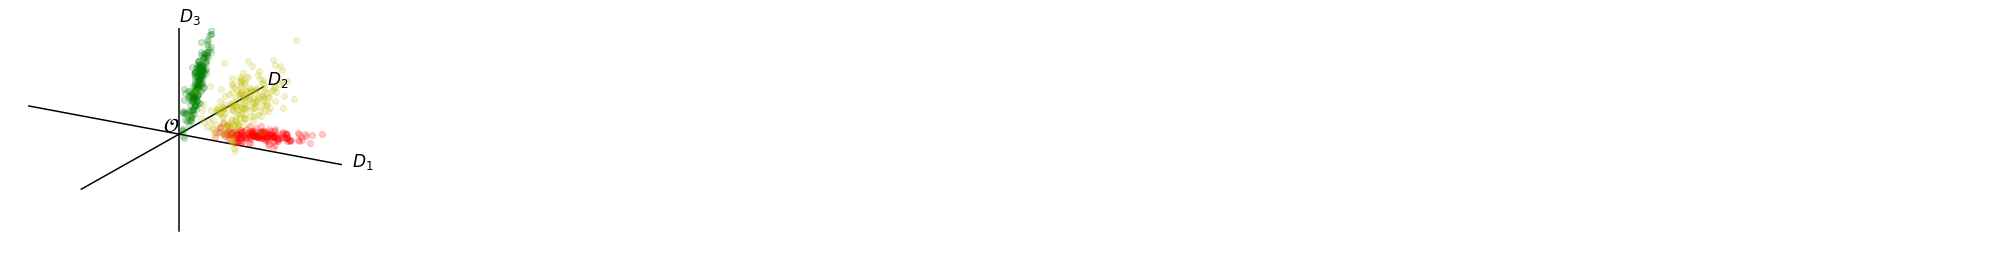

In [9]:
ax = plot_3D_axis()
for a in A:
    ax.plot([a[0]],[a[1]],[a[2]],"o",alpha=0.,color="b")
for a in A_x_y:
    ax.plot([a[0]],[a[1]],[a[2]],"o",alpha=0.2,color="r")
for a in A_y_z:
    ax.plot([a[0]],[a[1]],[a[2]],"o",alpha=0.2,color="g")
for a in A_x_z:
    ax.plot([a[0]],[a[1]],[a[2]],"o",alpha=0.2,color="y")

# Other projectors in the cardinal plane

In [10]:
Q =  np.asarray([[4.,2.,0],
                 [-4.,2.,0],
                 [0,0,0]])

### Vectors are orthogonal

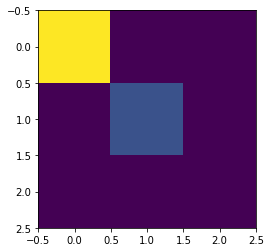

In [11]:
plt.imshow(Q.T.dot(Q))

### Get orthonormed

In [12]:
def get_norm(M,axis=0):
    return(np.sqrt((M**2).sum(axis=axis)))

In [13]:
def to_normed(M,axis=0):
    norms = get_norm(M,axis)
    for i,norm in enumerate(norms):
        if norm:
            M[:,i] *= 1./norm
    return(M)

In [14]:
norms = get_norm(Q)
Q = to_normed(Q)

In [15]:
norms

array([5.65685425, 2.82842712, 0.        ])

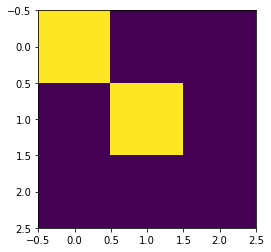

In [16]:
plt.imshow(Q.T.dot(Q))

### Compute projector

In [17]:
P = Q.dot(Q.T)

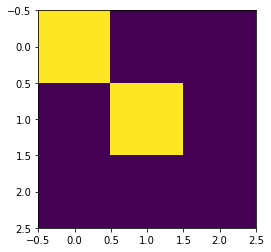

In [18]:
plt.imshow(P)

In [19]:
Q

array([[ 0.70710678,  0.70710678,  0.        ],
       [-0.70710678,  0.70710678,  0.        ],
       [ 0.        ,  0.        ,  0.        ]])

# Other projector in a different plane

In [20]:
Q =  np.asarray([[2.,1.,0],
                 [1.,-3.,0],
                 [1,1,0]])

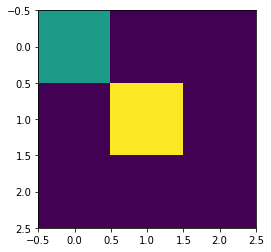

In [21]:
plt.imshow(Q.T.dot(Q))

### Get orthonormed

In [22]:
norms = get_norm(Q)
Q = to_normed(Q)

In [23]:
norms

array([2.44948974, 3.31662479, 0.        ])

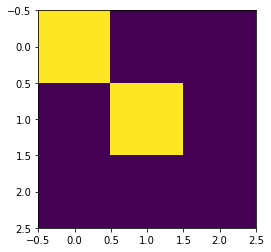

In [24]:
plt.imshow(Q.T.dot(Q))

### vectors are orthogonal

In [25]:
P = Q.dot(Q.T)

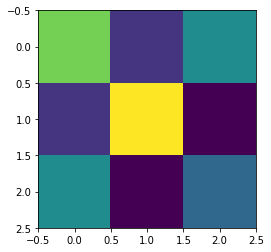

In [26]:
plt.imshow(P)

In [27]:
A_p = np.dot(A,P)

### Check properties

In [37]:
P

array([[ 0.75757576,  0.06060606,  0.42424242],
       [ 0.06060606,  0.98484848, -0.10606061],
       [ 0.42424242, -0.10606061,  0.25757576]])

In [38]:
P.dot(P)

array([[ 0.75757576,  0.06060606,  0.42424242],
       [ 0.06060606,  0.98484848, -0.10606061],
       [ 0.42424242, -0.10606061,  0.25757576]])

In [28]:
np.sum((A_p - A_p.dot(P))**2)

7.450026655624535e-30

### Get the vector that is normal to the plane defined by Q

Solve the system:

+ $\langle(x,y,z), Q_{.,1}\rangle = 2x+y+z = 0$
+ $\langle(x,y,z), Q_{.,2}\rangle = x - 3y - z = 0$

$(x=-4, y =1, z = 7)$:  is a solution

In [29]:
normal = np.asarray([-4,1,7])
normal = normal/get_norm(normal)

In [30]:
Q.T.dot(normal)

array([2.69677331e-17, 3.00799601e-17, 0.00000000e+00])

In [31]:
xx, yy = np.meshgrid(np.arange(-0.5,1.5,0.1), np.arange(-0.5,1.5,0.1))
z = (-normal[0] * xx - normal[1] * yy ) * 1. /normal[2]


### Plot projection

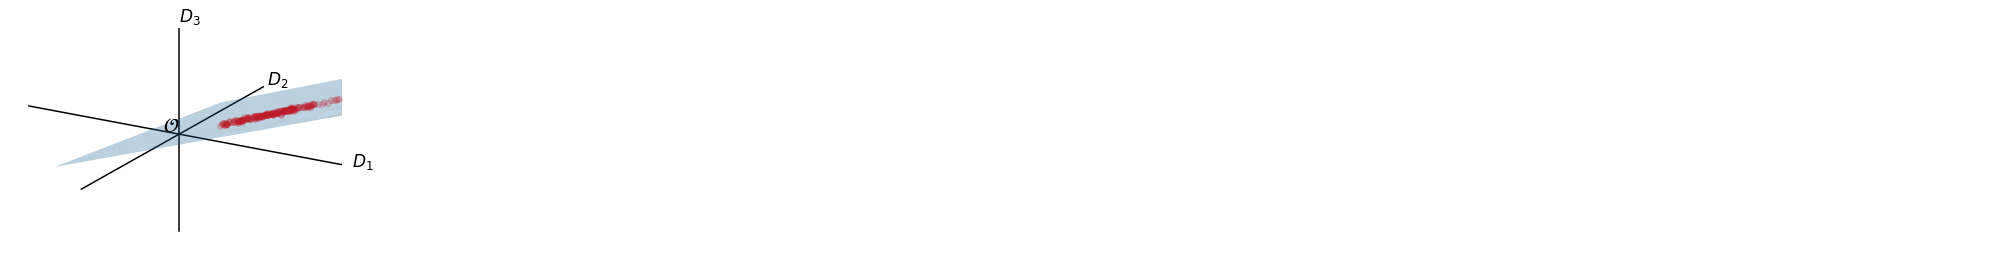

In [32]:
ax = plot_3D_axis()
ax.plot_surface(xx, yy, z,alpha=0.3)
for a in A_p:
    ax.plot([a[0]],[a[1]],[a[2]],"o",alpha=0.2,color="r")